In [4]:
import pandas as pd
df=pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
print(df.shape)

(768, 9)


In [20]:
#建立神經網路
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(10) 
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
X = dataset[:, 0:8]
Y = dataset[:, 8]
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
##model.summary()
#編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
#訓練模型
model.fit(X, Y, epochs=150, batch_size=10)
#評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

Epoch 1/150
77/77 [==============================] - 0s 826us/step - loss: 1.0328 - accuracy: 0.5951
Epoch 2/150
77/77 [==============================] - 0s 891us/step - loss: 0.6459 - accuracy: 0.6393
Epoch 3/150
77/77 [==============================] - 0s 882us/step - loss: 0.6280 - accuracy: 0.6510
Epoch 4/150
77/77 [==============================] - 0s 883us/step - loss: 0.6242 - accuracy: 0.6615
Epoch 5/150
77/77 [==============================] - 0s 856us/step - loss: 0.6209 - accuracy: 0.6615
Epoch 6/150
77/77 [==============================] - 0s 852us/step - loss: 0.6116 - accuracy: 0.6641
Epoch 7/150
77/77 [==============================] - 0s 850us/step - loss: 0.6150 - accuracy: 0.6628
Epoch 8/150
77/77 [==============================] - 0s 810us/step - loss: 0.6225 - accuracy: 0.6471
Epoch 9/150
77/77 [==============================] - 0s 894us/step - loss: 0.6140 - accuracy: 0.6510
Epoch 10/150
77/77 [==============================] - 0s 865us/step - loss: 0.6050 - accura

77/77 [==============================] - 0s 811us/step - loss: 0.5670 - accuracy: 0.7188
Epoch 81/150
77/77 [==============================] - 0s 786us/step - loss: 0.5767 - accuracy: 0.7005
Epoch 82/150
77/77 [==============================] - 0s 810us/step - loss: 0.5685 - accuracy: 0.7227
Epoch 83/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7005
Epoch 84/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7057: 0s - loss: 0.5740 - accuracy: 0.69
Epoch 85/150
77/77 [==============================] - 0s 834us/step - loss: 0.5657 - accuracy: 0.7227
Epoch 86/150
77/77 [==============================] - 0s 807us/step - loss: 0.5514 - accuracy: 0.7214
Epoch 87/150
77/77 [==============================] - 0s 762us/step - loss: 0.5716 - accuracy: 0.7148
Epoch 88/150
77/77 [==============================] - 0s 779us/step - loss: 0.5626 - accuracy: 0.7135
Epoch 89/150
77/77 [==============================] - 0s 819us/

In [33]:
'''
優化模型準確度(使用特徵標準化)
'''
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
X = dataset[:, 0:8]
Y = dataset[:, 8]
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
##model.summary()
#編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
#訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
#評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

24/24 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8060
準確度 = 0.81


In [34]:
'''
優化模型準確度(使用特徵標準化、One-hot編碼、Initializers)
'''
from tensorflow.keras.utils import to_categorical
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
X = dataset[:, 0:8]
Y = dataset[:, 8]
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
#One-hot編碼
Y = to_categorical(Y)
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,),
                kernel_initializer="random_uniform", 
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(8, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(2, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="softmax"))
##model.summary()
#編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
#訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
#評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

24/24 [==============================] - 0s 828us/step - loss: 0.4637 - accuracy: 0.7839
準確度 = 0.78


In [41]:
'''
優化模型準確度(使用特徵標準化、One-hot編碼、adam優化器)
'''
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
X = dataset[:, 0:8]
Y = dataset[:, 8]
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
#One-hot編碼
Y = to_categorical(Y)
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
##model.summary()

#編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
#訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
#評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

24/24 [==============================] - 0s 827us/step - loss: 0.3788 - accuracy: 0.8203
準確度 = 0.82


In [42]:
'''
優化模型準確度(使用特徵標準化、One-hot編碼、adam優化器、減少神經網路的參數量)
'''
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
X = dataset[:, 0:8]
Y = dataset[:, 8]
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
#One-hot編碼
Y = to_categorical(Y)
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
##model.summary()

#編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
#訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
#評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

24/24 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8281
準確度 = 0.83


In [44]:
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
X = dataset[:, 0:8]
Y = dataset[:, 8]
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
#One-hot編碼
Y = to_categorical(Y)
#分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
##model.summary()

#編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
#訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
#評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
'''
若兩準確度相差太大-->預測模型過度擬合(學習次數太多)
'''

22/22 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8391
訓練資料集的準確度 = 0.84
3/3 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7564
測試資料集的準確度 = 0.76


Epoch 1/150
69/69 [==============================] - ETA: 0s - loss: 0.7835 - accuracy: 0.390 - 1s 3ms/step - loss: 0.7846 - accuracy: 0.3971 - val_loss: 0.7216 - val_accuracy: 0.5513
Epoch 2/150
69/69 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.5826 - val_loss: 0.6859 - val_accuracy: 0.6154
Epoch 3/150
69/69 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.6362 - val_loss: 0.6552 - val_accuracy: 0.6538
Epoch 4/150
69/69 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.6638 - val_loss: 0.6230 - val_accuracy: 0.6667
Epoch 5/150
69/69 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.6913 - val_loss: 0.5916 - val_accuracy: 0.6795
Epoch 6/150
69/69 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7174 - val_loss: 0.5651 - val_accuracy: 0.7051
Epoch 7/150
69/69 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7290 - val_loss: 

Epoch 57/150
69/69 [==============================] - ETA: 0s - loss: 0.4168 - accuracy: 0.80 - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8029 - val_loss: 0.4466 - val_accuracy: 0.7564
Epoch 58/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7986 - val_loss: 0.4481 - val_accuracy: 0.7564
Epoch 59/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.7986 - val_loss: 0.4445 - val_accuracy: 0.7564
Epoch 60/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8029 - val_loss: 0.4456 - val_accuracy: 0.7564
Epoch 61/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8029 - val_loss: 0.4441 - val_accuracy: 0.7564
Epoch 62/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8058 - val_loss: 0.4458 - val_accuracy: 0.7564
Epoch 63/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.7986 - val_

Epoch 114/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8188 - val_loss: 0.4600 - val_accuracy: 0.7308
Epoch 115/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8159 - val_loss: 0.4612 - val_accuracy: 0.7308
Epoch 116/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8159 - val_loss: 0.4575 - val_accuracy: 0.7308
Epoch 117/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8159 - val_loss: 0.4564 - val_accuracy: 0.7308
Epoch 118/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8174 - val_loss: 0.4618 - val_accuracy: 0.7308
Epoch 119/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8116 - val_loss: 0.4615 - val_accuracy: 0.7308
Epoch 120/150
69/69 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8159 - val_loss: 0.4612 - val_accuracy: 0.7308

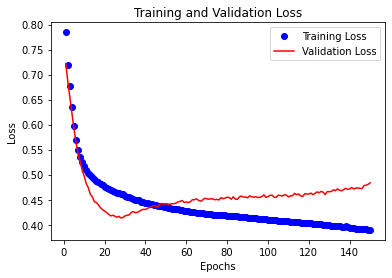

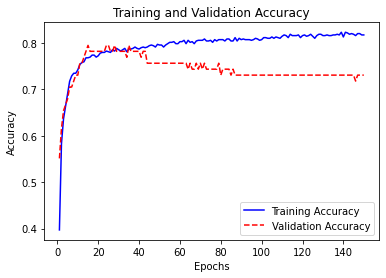

In [59]:
'''
驗證資料集(手動分割)
'''
import matplotlib.pyplot as plt
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
#分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
#One-hot編碼
Y = to_categorical(Y)
#分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]      
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
##model.summary()
#編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
#訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
          epochs=150, batch_size=10)
#評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
#顯示訓練和驗證損失的圖表
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#顯示訓練和驗證準確度
accuracy = history.history["accuracy"]
epochs = range(1, len(accuracy)+1)
val_accuracy = history.history["val_accuracy"]
plt.plot(epochs, accuracy, "b-", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "r--", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

22/22 [==============================] - 0s 905us/step - loss: 0.4702 - accuracy: 0.7725
訓練資料集的準確度 = 0.77
3/3 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7564
測試資料集的準確度 = 0.76


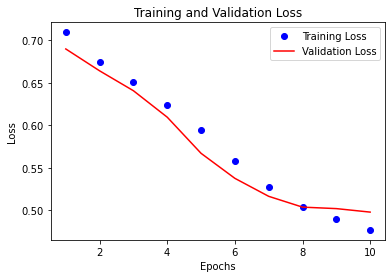

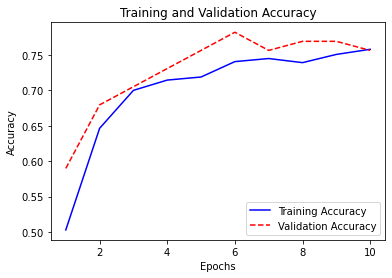

In [62]:
'''
減少學習次數
'''
import matplotlib.pyplot as plt
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
#分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
#One-hot編碼
Y = to_categorical(Y)
#分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]      
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
##model.summary()
#編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
#訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
          epochs=10, batch_size=10, verbose=0)
#評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
#顯示訓練和驗證損失的圖表
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#顯示訓練和驗證準確度
accuracy = history.history["accuracy"]
epochs = range(1, len(accuracy)+1)
val_accuracy = history.history["val_accuracy"]
plt.plot(epochs, accuracy, "b-", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "r--", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

22/22 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7667
訓練資料集的準確度 = 0.77
3/3 [==============================] - 0s 9ms/step - loss: 0.4546 - accuracy: 0.7564
測試資料集的準確度 = 0.76


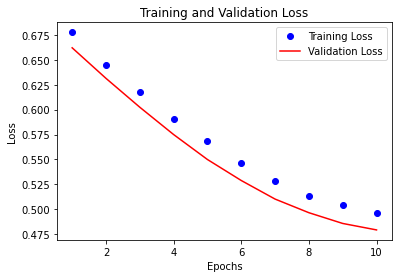

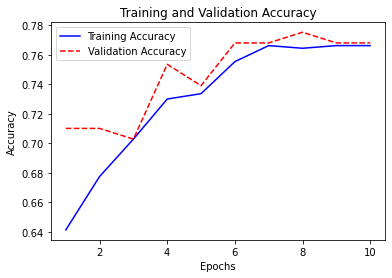

In [72]:
'''
驗證資料集(自動分割)
'''
import matplotlib.pyplot as plt
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
#分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
#One-hot編碼
Y = to_categorical(Y)
#分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]      
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
##model.summary()
#編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
#訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=10, batch_size=10, verbose=0)
#評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
#顯示訓練和驗證損失的圖表
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#顯示訓練和驗證準確度
accuracy = history.history["accuracy"]
epochs = range(1, len(accuracy)+1)
val_accuracy = history.history["val_accuracy"]
plt.plot(epochs, accuracy, "b-", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "r--", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [77]:
import matplotlib.pyplot as plt
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
#分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
#特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
#One-hot編碼
Y = to_categorical(Y)
#分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]      
#定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
##model.summary()
#編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
#訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
          epochs=10, batch_size=10, verbose=0)
#評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict(X_test, batch_size=10, verbose=0)
print(Y_pred[0])

22/22 [==============================] - 0s 859us/step - loss: 0.5029 - accuracy: 0.7667
訓練資料集的準確度 = 0.77
3/3 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7179
測試資料集的準確度 = 0.72
[0.9842816 0.0157184]


In [88]:
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict(X_test, batch_size=10, verbose=0)
print(Y_pred[0])

22/22 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.7768
訓練資料集的準確度 = 0.78
3/3 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7692
測試資料集的準確度 = 0.77
[0.2983495]


In [104]:
from keras.models import Sequential
#資料預處理
df = pd.read_csv("C:/Users/user/Python_ML/Medical_diagnosis/diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]
X_test, Y_test = X[690:], Y[690:]
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=20, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
predict_x=model.predict(X_test, batch_size=20, verbose=0)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

22/22 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8029
訓練資料集的準確度 = 0.80
3/3 [==============================] - 0s 0s/step - loss: 0.4814 - accuracy: 0.7564
測試資料集的準確度 = 0.76
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
